# Week 11 Problem Set


In [1]:
# %load_ext nb_mypy
# %nb_mypy On

In [2]:
from typing import TypeAlias
from typing import Optional, Any    

Number: TypeAlias = int | float

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from IPython.display import display

## Homeworks

**HW0.** Do the following before starting the homework questions.

**Task 1.** Paste the following functions from your cohort sessions:
- `get_features_target()`
- `normalize_z()`
- `normalize_minmax()`
- `replace_target()`
- `split_data()`
- `prepare_feature()`
- `calc_logreg()`
- `compute_cost_logreg()`
- `gradient_descent_logreg()`
- `predict_norm()`
- `predict_logreg()`
- `confusion_matrix()`

In [4]:
def get_features_targets(df: pd.DataFrame, 
                         feature_names: list[str], 
                         target_names: list[str]) -> tuple[pd.DataFrame, pd.DataFrame]:
    
    df_feature = df[feature_names]
    df_target = df[target_names]
    
    return df_feature, df_target


def normalize_z(array: np.ndarray, 
                columns_means: Optional[np.ndarray]=None, 
                columns_stds: Optional[np.ndarray]=None) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    
    if (columns_means is None):
        columns_means = array.mean(axis=0)
    if (columns_stds is None):
        columns_stds = array.std(axis=0)
    
    out = (array - columns_means) / columns_stds    
    
    return out, columns_means, columns_stds

def normalize_minmax(array_in: np.ndarray, columns_mins: Optional[np.ndarray]=None, 
                     columns_maxs: Optional[np.ndarray]=None) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    
    out = np.copy(array_in)
    if columns_mins is None:
        columns_mins = np.min(array_in, axis = 0).reshape(1,-1)
    if columns_maxs is None:
        columns_maxs  = np.max(array_in, axis = 0).reshape(1,-1)
    
    out = (out - columns_mins)/(columns_maxs - columns_mins)
    return out, columns_mins, columns_maxs

def prepare_feature(np_feature: np.ndarray) -> np.ndarray:
    ones = np.ones(shape = (np_feature.shape[0], 1))
    
    return np.concatenate((ones, np_feature), axis = 1)

def replace_target(df_target: pd.DataFrame, 
                   target_name: str, map_vals: dict[Any, Any]) -> pd.DataFrame:
    df_out = df_target.copy()
    df_out[target_name] = df_out[target_name].apply(lambda x: map_vals[x])
    return df_out

def split_data(df_feature: pd.DataFrame, df_target: pd.DataFrame, 
               random_state: Optional[int]=None, 
               test_size: float=0.5) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    
    np.random.seed(random_state)
    index = np.random.choice(df_feature.shape[0], int(df_feature.shape[0]*test_size), replace = False)
    df_feature_train = df_feature.drop(index)
    df_feature_test = df_feature.loc[index]
    df_target_train = df_target.drop(index)
    df_target_test = df_target.loc[index]
    return df_feature_train, df_feature_test, df_target_train, df_target_test

def calc_logreg(X: np.ndarray, beta: np.ndarray) -> np.ndarray:
    X: np.ndarray = X.astype(float)
    beta: np.ndarray = beta.astype(float)
    z = - (np.matmul(X,beta))
    return 1/(1+ np.exp(z))

def compute_cost_logreg(beta: np.ndarray, 
                        X: np.ndarray, 
                        y: np.ndarray) -> Number:
    np.seterr(divide = 'ignore') 
    
    m = X.shape[0]
    y_hat = calc_logreg(X, beta)
    log_p_x = np.log(y_hat)
    log_one_min_p_x = np.log(1-y_hat)
    
    J = -(1/m) * np.sum(np.where(y==1, log_p_x, log_one_min_p_x))
    
    np.seterr(divide = 'warn')
    J = np.squeeze(J)
    return J

def gradient_descent_logreg(X: np.ndarray, 
                            y: np.ndarray, 
                            beta: np.ndarray, 
                            alpha: float,
                            num_iters: int) -> tuple[np.ndarray, np.ndarray]:
    m = X.shape[0]
    J_storage = np.zeros((num_iters, 1))
    
    for i in range(0, num_iters):
        y_hat = calc_logreg(X, beta)
        beta = beta - (alpha) * (1/m) * np.matmul(X.T, y_hat - y)
        cost = compute_cost_logreg(beta, X, y)
        J_storage[i] = cost
    
    return beta, J_storage

def predict_norm(X: np.ndarray, beta: np.ndarray) -> np.ndarray:
    y_hat_test = calc_logreg(X, beta)
    return np.where(y_hat_test >= 0.5, 1.0, 0)

def predict_logreg(array_feature: np.ndarray, 
                   beta: np.ndarray, 
                   means: Optional[np.ndarray]=None, 
                   stds: Optional[np.ndarray]=None) -> np.ndarray:
    X, means, stds = normalize_z(array_feature, means, stds)
    X = prepare_feature(X)
    
    return predict_norm(X, beta)
  
import itertools
def confusion_matrix(ytrue: np.ndarray, 
                     ypred: np.ndarray, 
                     labels: list[int]) -> dict[tuple[int, int], int]:
    output: dict[tuple[int, int], int] = {}
    keys = itertools.product(labels, labels)
    
    for key in keys:
        output[key] = 0;
    
    n, m = ytrue.shape
    for i in range(n):
        y_i = ytrue[i][0]
        y_hat_i = ypred[i][0]
        key = (y_i, y_hat_i)
        output[key] += 1
    return output

**Task 2.** Load the Iris data set from `iris_data.csv` into a Data Frame. 

    

In [5]:
# read iris_data.csv
df: pd.DataFrame = pd.read_csv("iris_data.csv")

###
### YOUR CODE HERE
###
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Task 3.** Do the following tasks.

- Read the following columns for the features: `'sepal_length', 'sepal_width', 'petal_length', 'petal_width'`.
- Read the column `species` for the target.
- Replace the `species` column with the following mapping:
    - `Iris-setosa`: `0`
    - `Iris-versicolor`: `1`
    - `Iris-virginica`: `2`

In [6]:
columns: list[str] = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
mapping: dict[str, int] = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}

# extract the features and the target
df_features, df_target = get_features_targets(df, columns, ["species"])

# replace the target using the mapping
df_target: pd.DataFrame = replace_target(df_target, "species", mapping)

###
### YOUR CODE HERE
###


In [8]:
result: tuple[list[Any], list[int]] = np.unique(df_target['species'], return_counts=True)
assert np.array(result[0] == [0, 1, 2]).all()
assert np.array(result[1] == [50, 50, 50]).all()

###
### AUTOGRADER TEST - DO NOT REMOVE
###


**HW1.** *One-vs-All target:* Write a function that takes in a target data frame and returns a new dataframe where the size of the column is the same as the number of category. The function makes use of `replace_target()` function to create one-vs-all target values. 

For example, if we have three categories of class, the columns of the returned data frame will be as follows:
- column target: this is the original target column
- column 0: the target with values of 0 will be set to 1 while the rest will be replaced with 0.
- column 1: the target with values of 1 will be set to 1 while the rest will be replaced with 0.
- column 2: the target with values of 2 will be set to 1 while while the rest will be replaced with 0.

In [9]:
def create_onevsall_columns(df_target: pd.DataFrame, col: str) -> pd.DataFrame:
    dfout: pd.DataFrame = df_target.copy()
    uniq = sorted(df_target[col].unique())
    for cat in uniq:
        dfout[cat] = (df_target[col] == cat).astype(int)
    return dfout

In [10]:
df_targets: pd.DataFrame = create_onevsall_columns(df_target, 'species')
print(df_targets)
result: tuple[list[int], list[int]] = np.unique(df_targets['species'], return_counts=True)
assert np.array(result[0] == [0, 1, 2]).all()
assert np.array(result[1] == [50, 50, 50]).all()
result:  tuple[list[int], list[int]] = np.unique(df_targets[0], return_counts=True)
assert np.array(result[0] == [0, 1]).all()
assert np.array(result[1] == [100, 50]).all()
result: tuple[list[int], list[int]]  = np.unique(df_targets[1], return_counts=True)
assert np.array(result[0] == [0, 1]).all()
assert np.array(result[1] == [100, 50]).all()
result: tuple[list[int], list[int]] = np.unique(df_targets[2], return_counts=True)
assert np.array(result[0] == [0, 1]).all()
assert np.array(result[1] == [100, 50]).all()

###
### AUTOGRADER TEST - DO NOT REMOVE
###


     species  0  1  2
0          0  1  0  0
1          0  1  0  0
2          0  1  0  0
3          0  1  0  0
4          0  1  0  0
..       ... .. .. ..
145        2  0  0  1
146        2  0  0  1
147        2  0  0  1
148        2  0  0  1
149        2  0  0  1

[150 rows x 4 columns]


In [11]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###

###
### AUTOGRADER TEST - DO NOT REMOVE
###


**HW2.** *Multiple features and splitting of data set:* Do the following task in the code below:
- Read the following columns for the features: `sepal_length`,`sepal_width`, `petal_length`, `petal_width` normalize it using `normalize_z()`. 
- Read `species` as the target column and use `create_onevsall_columns()` to create the additional target columns to do multi class classification.
- Split the data set with 30% test size and `random_state = 100`.
- Normalize the training feature data set using `normalize_z()` function.
- Convert to numpy array both the target and the features using `prepare_feature()` and `prepare_target()` functions.
- Call `gradient_descent_logreg()` function to get the parameters using the training data set.

In [12]:
columns: list[str] = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
mapping: dict[str, int] = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}

# extract the features and the target
df_features, df_target = get_features_targets(df, columns, ["species"])

# change target values to integer using mapping
df_target: pd.DataFrame = replace_target(df_target, "species", mapping)

# create one vs all columns for the target
df_targets: pd.DataFrame = create_onevsall_columns(df_target, "species")

# split the data using random_state = 100 and 30% test size
df_features_train, df_features_test, df_targets_train, df_targets_test = split_data(df_features, df_targets, random_state=100, test_size=0.3)

# normalize the training feature
array_features_train_z, means, stds = normalize_z(df_features_train.to_numpy())


###
### YOUR CODE HERE
###


In [13]:
assert array_features_train_z.shape == (105, 4)

assert np.isclose(array_features_train_z.min(), -2.5356, rtol=1e-3).any()
assert np.isclose(array_features_train_z.max(), 2.74595, rtol=1e-3).any()
assert np.isclose(array_features_train_z[:,1].mean(), 0)
assert np.isclose(array_features_train_z[:,1].std(), 1, atol=0.01)

assert (np.unique(df_targets_train['species']) == [0, 1, 2]).all()
assert (np.unique(df_targets_train[0]) == [0, 1]).all()
assert (np.unique(df_targets_train[1]) == [0, 1]).all()
assert (np.unique(df_targets_train[2]) == [0, 1]).all()

###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [14]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###

###
### AUTOGRADER TEST - DO NOT REMOVE
###


**HW3.** *Build Multi-class Model:* Write a function `build_model_multiclass()` which takes in the following arguments:
- `df_features`: which is a Pandas data framecontaining the features.
- `df_targets`: which is a Pandas data frame containing the target for one vs all classification. 
- `col_target`: the name of the column target in the original data frame which is also the key of the dictionary containing the original target numpy array.
- `iterations`: the number of iterations to perform the gradient descent. By default it is set to 1500.
- `alpha`: the learning rate in the gradient descent algorithm. By default it is set to 0.01.

The function should return a dictionary of dictionary. The output dictionary has the following key and values:
- key: the keys are the categories or the labels in the target.
- values: the values are another dictionary for that particular label. This dictionary has two keys: `beta` and `J_storage`, which gives the parameter value for that particular label and its cost minimization values at every iteration.

Hint:
- you need to call `prepare_feature()` and `prepare_target()` to change the Pandas data frame to Numpy arrays.
- in order to create a data frame instead of a series when accessing a column, use `df[[c]]` (will output data frame) instead of `df[c]` (will output series). 

In [22]:
def build_model_multiclass(array_features: np.ndarray, 
                           array_targets: np.ndarray, 
                           categories: list[int], 
                           iterations: int=1500, 
                           alpha: float=0.01) -> dict[int, dict[str, np.ndarray]]:
    output: dict[int, dict[str, np.ndarray]] = {}
    
    for i, cat in enumerate(categories):
        ar_targ = array_targets[:, i].reshape(-1,1)
        prepp = prepare_feature(array_features)
        
        n, m = prepp.shape
        beta = np.zeros((m, 1))
        
        beta, J_storage = gradient_descent_logreg(prepp, ar_targ, beta, alpha, iterations)
        
        output[cat] = {
            "beta": beta,
            "J_storage": J_storage
        }
    return output
    

In [23]:
array_target: np.ndarray = df_targets_train.loc[:, 0:2].to_numpy().reshape(-1,3)
categories: list[int]= df_targets_train.columns[1:].to_numpy()
output: dict[int, dict[str, np.ndarray]] = build_model_multiclass(array_features_train_z, array_target, categories)  
assert isinstance(output, dict)
expected: np.ndarray = np.array([[-1.01928637], [-0.69653323], [1.07701896], [-1.16966977], [-1.1264483]])
assert np.isclose(output[0]['beta'], expected).all()
expected: np.ndarray = np.array([[-0.63356421], [ 0.11772068], [-1.15158396], [0.18666234], [-0.14699617]])
assert np.isclose(output[1]['beta'], expected).all()
expected: np.ndarray = np.array([[-1.31888826], [0.41897682], [0.18622186], [ 0.88106221], [1.17816917]])
assert np.isclose(output[2]['beta'], expected).all()

###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [24]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###

###
### AUTOGRADER TEST - DO NOT REMOVE
###


class model = 0 [[-1.01928637]
 [-0.69653323]
 [ 1.07701896]
 [-1.16966977]
 [-1.1264483 ]]
class model = 1 [[-0.63356421]
 [ 0.11772068]
 [-1.15158396]
 [ 0.18666234]
 [-0.14699617]]
class model = 2 [[-1.31888826]
 [ 0.41897682]
 [ 0.18622186]
 [ 0.88106221]
 [ 1.17816917]]


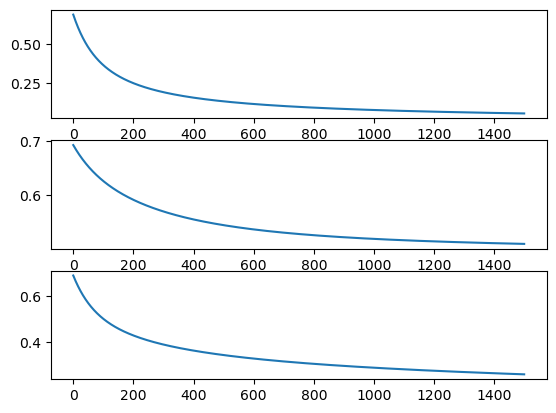

In [25]:
fig, axes = plt.subplots(len(output), 1)
idx: int = 0
for c in output:
    print(f'class model = {c:}', output[c]['beta'])
    axes[idx].plot(output[c]['J_storage'])
    idx += 1

**HW4.** *Predict Multi-class:* Write a function `predict_multiclass()` that takes in the data frame for the features and the parameters for the multi-class classification and return a Numpy array for the predicted target.

Recall that you need to do the following steps:
- Normalize the features and change to numpy array
- For each of the class, calculate the probability by using `calc_logreg()` function.
- For each record, find the class that gives the maximum probability.
- Returns a Numpy array with the predicted target values

You can use the following function in your code:
- `np.argmax()` to find the column name with the maximum value

In [26]:
def predict_multiclass(array_features: np.ndarray, 
                       multi_beta: dict[int, dict[str, np.ndarray]], 
                       means: Optional[np.ndarray]=None, 
                       stds: Optional[np.ndarray]=None) -> np.ndarray:
    # Normalize the features
    normz,_,_ = normalize_z(array_features, means, stds)
    
    #prepare the features
    prep = prepare_feature(normz)
    
    #get the probabilities
    prob = []
    for cat, params in multi_beta.items():
        beta = params['beta']
        prob.append(calc_logreg(prep, beta))
    
    #stack the probabilities into a matrix
    prob_mat = np.hstack(prob)
    
    return np.argmax(prob_mat, axis = 1).reshape(-1,1)

In [27]:
array_features: np.ndarray = df_features_test.to_numpy()
pred: np.ndarray = predict_multiclass(array_features, output)

assert isinstance(pred, np.ndarray)
assert pred.shape == (45, 1)
assert pred.min() == 0
assert pred.max() == 2
assert np.median(pred) == 1

###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [28]:
input_1row: np.ndarray = np.array([[6.3, 3.4, 5.6,2.4]])
pred_1row: np.ndarray = predict_multiclass(input_1row, output, means, stds)
assert pred_1row[0][0] == 2

###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [29]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###

###
### AUTOGRADER TEST - DO NOT REMOVE
###


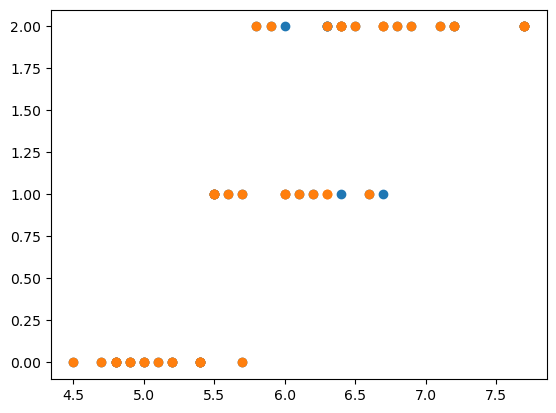

In [30]:
plt.scatter(df_features_test['sepal_length'], df_targets_test['species'])
plt.scatter(df_features_test['sepal_length'], pred)

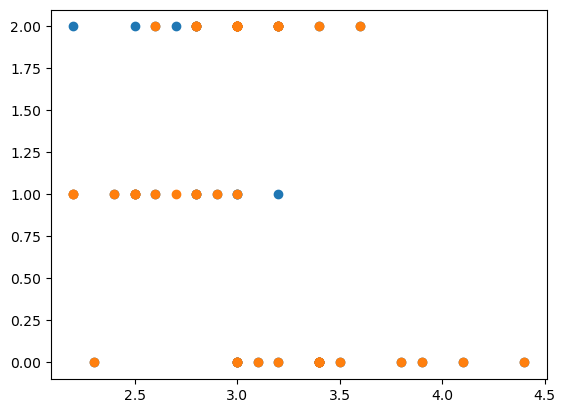

In [31]:
plt.scatter(df_features_test['sepal_width'], df_targets_test['species'])
plt.scatter(df_features_test['sepal_width'], pred)

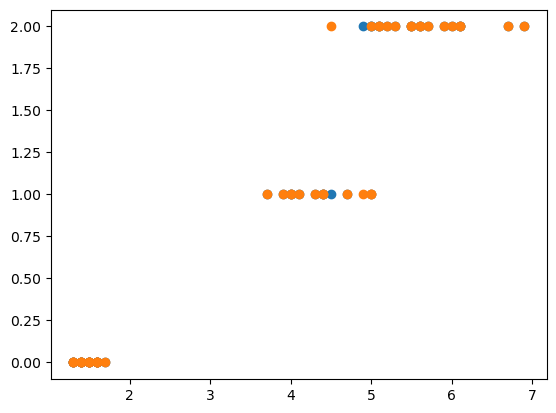

In [32]:
plt.scatter(df_features_test['petal_length'], df_targets_test['species'])
plt.scatter(df_features_test['petal_length'], pred)

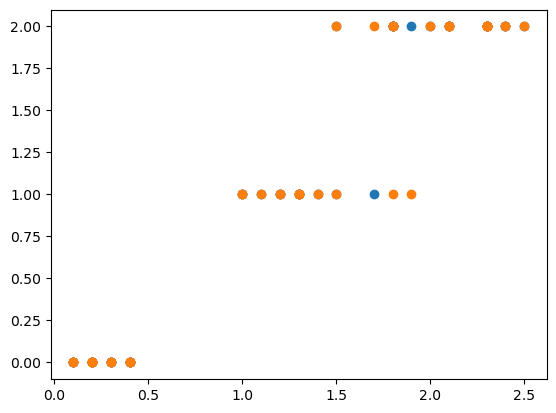

In [33]:
plt.scatter(df_features_test['petal_width'], df_targets_test['species'])
plt.scatter(df_features_test['petal_width'], pred)

**HW5.** *Confusion Matrix:* Write a function to calculate the confusion matrix for multi-class label. If you write the solution in the Cohort session properly, the solution will be the same as in the Cohort session.

Make sure that you can output a dictionary where the keys are all the combinations of all the classes: `(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)`.

In [34]:
import itertools
def confusion_matrix(ytrue: np.ndarray, ypred: np.ndarray, labels: list[int]) -> dict[tuple[int, int], int]:
    output: dict[tuple[int, int], int] = {}
    keys = itertools.product(labels, labels)
    
    for key in keys:
        output[key] = 0;
    
    n, m = ytrue.shape
    for i in range(n):
        y_i = ytrue[i][0]
        y_hat_i = ypred[i][0]
        key = (y_i, y_hat_i)
        output[key] += 1
    return output

In [35]:
cm: dict[tuple[int, int], int] = confusion_matrix(df_targets_test.values, pred, [0, 1, 2])
print(cm)
assert cm == {(0, 0): 16, (0, 1): 0, (0, 2): 0, (1, 0): 0, (1, 1): 8, (1, 2): 3, (2, 0): 0, (2, 1): 3, (2, 2): 15} or\
        cm == {(0, 0): 16, (0, 1): 0, (0, 2): 0, (1, 0): 0, (1, 1): 9, (1, 2): 2, (2, 0): 0, (2, 1): 3, (2, 2): 15} 

###
### AUTOGRADER TEST - DO NOT REMOVE
###


{(0, 0): 16, (0, 1): 0, (0, 2): 0, (1, 0): 0, (1, 1): 9, (1, 2): 2, (2, 0): 0, (2, 1): 3, (2, 2): 15}


In [36]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###

###
### AUTOGRADER TEST - DO NOT REMOVE
###


**HW6.** *Metrics:* Write a function `calc_accuracy()` that takes in a Confusion Matrix array and output a dictionary with the following keys and values:
- `accuracy`: total number of correct predictions / total number of records
- `sensitivity`: total correct positive cases / total positive cases
- `precision`: total  of correct positive cases / total predicted positive cases

For multiple classes, we can also calculate *sensitivity* and *precision* for each of the class. For example, to calculate the sensitivity for class *i*, we use:

$$\text{sensitivity}_i = \frac{M_{ii}}{\sum_j{M_{ij}}}$$

This means that we get the value at row *i* and columnn *i* which is the total correct case for class *i* and the sum over all the columns in row *i* which is the total cases for class *i*. 

Similarly, we can calculate the precision for class *i* using:

$$\text{precision}_i = \frac{M_{ii}}{\sum_j{M_{ji}}}$$

**Notice that the indices are swapped for the denominator**. For precision, we instead of summing over all the columns, we sum over all the rows in column *i* which is the total cases when class *i* is *predicted*.

The output is a dictionary with one of the keys called `accuracy` and the rest of the keys are the label for the different classes, i.e. 0, 1, and 2 in our example here. The value for `accuracy` key is a float. On the other hand, the values for the other label keys is another dictionary that has `sensitivity` and `precision` as the keys.

In [39]:
def divv (a, b):
    if (b == 0):
        return 0
    return a/b;

def calc_accuracy(cm: dict[tuple[int,int], int], 
                  labels: list[int]) -> dict:
    output: dict = {'accuracy': 0.0}
    
    tot_cor = 0
    tot_rec = sum(cm.values())
    
    for l in labels:
        true_pos = cm.get((l,l), 0)
        tot_cor += true_pos
        
        ta = 0
        for i in labels:
            ta += cm.get((l,i), 0)
        
        sens = divv(true_pos, ta)
        
        tp = 0
        for i in labels:
            tp += cm.get((i,l), 0)
        prec = divv(true_pos, tp)
        
        output[l] = {"sensitivity": sens, "precision": prec}
    
    output["accuracy"] = divv(tot_cor, tot_rec)
    ###
    ### YOUR CODE HERE
    ###
    return output

In [40]:
metrics: dict = calc_accuracy(cm, [0,1,2])
print(metrics)
assert np.isclose(metrics['accuracy'], 0.8666667) or np.isclose(metrics['accuracy'], 0.8888888)
assert metrics[0] == {'sensitivity': 1.0, 'precision': 1.0} 
assert np.isclose(metrics[0]['sensitivity'], 1.0)
assert np.isclose(metrics[0]['precision'], 1.0)
assert np.isclose(metrics[1]['sensitivity'], 0.72727272) or np.isclose(metrics[1]['sensitivity'], 0.818181818)
assert np.isclose(metrics[1]['precision'], 0.72727272) or np.isclose(metrics[1]['precision'], 0.75)
assert np.isclose(metrics[2]['sensitivity'], 0.833333)
assert np.isclose(metrics[2]['precision'], 0.833333) or np.isclose(metrics[2]['precision'], 0.88235294)


###
### AUTOGRADER TEST - DO NOT REMOVE
###


{'accuracy': 0.8888888888888888, 0: {'sensitivity': 1.0, 'precision': 1.0}, 1: {'sensitivity': 0.8181818181818182, 'precision': 0.75}, 2: {'sensitivity': 0.8333333333333334, 'precision': 0.8823529411764706}}


In [60]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###

###
### AUTOGRADER TEST - DO NOT REMOVE
###


**HW7.** *Optional:* Redo the above tasks using Scikit Learn libraries. You will need to use the following:
- [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

You can refer to the followign discussion on the different minimization solver for `LogisticRegression()` class.
- [Stack overflow - logistic regression python solvers' defintions](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm_sk

In [63]:
columns: list[str] = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
mapping: dict[str, int] = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}

# get the features and the columns
# df_features: pd.DataFrame = None

# replace target values with integers using the mapping
# df_target: pd.DataFrame = None


###
### YOUR CODE HERE
###


In [64]:
# split data set using random_state = 100 and 30% test size
# df_features_train, df_features_test, df_target_train, df_target_test = None, None, None, None

# change feature to numpy array and append column of 1s
# feature: np.ndarray = None

# change target to numpy array
# target: np.ndarray = None

###
### YOUR CODE HERE
###


In [65]:
# create LogisticRegression object instance
# set solver to 'newton-cg' and multi_class to 'auto'
# model: LogisticRegression = None

# build model
# pass

# get predicted value
# pred: np.ndarray = None

###
### YOUR CODE HERE
###


In [66]:
# calculate confusion matrix
# cm: dict[tuple[int, int], int] = None

###
### YOUR CODE HERE
###
print(cm)


In [ ]:
expected: np.ndarray = np.array([[16,  0,  0], [ 0, 11,  0], [ 0,  1, 17]])
assert np.array(cm == expected).all()

In [ ]:
plt.scatter(df_features_test["sepal_width"], df_target_test)
plt.scatter(df_features_test["sepal_width"], pred)

In [ ]:
plt.scatter(df_features_test["sepal_length"], df_target_test)
plt.scatter(df_features_test["sepal_length"], pred)

In [ ]:
plt.scatter(df_features_test["petal_width"], df_target_test)
plt.scatter(df_features_test["petal_width"], pred)

In [ ]:
plt.scatter(df_features_test["petal_length"], df_target_test)
plt.scatter(df_features_test["petal_length"], pred)